In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

In [2]:
script_dir = os.getcwd() 
rel_path = 'txt_sentoken\\'
data_path = os.path.join(script_dir, rel_path)

In [3]:
positive_reviews = []
negative_reviews = []

for data_class in os.listdir(data_path):
  for review in os.listdir(os.path.join(data_path, data_class)):
    with open(os.path.join(data_path, data_class, review)) as f:
      review_content = f.read().replace('\n', '')

      if data_class == 'pos':
        positive_reviews.append(review_content)
      elif data_class == 'neg':
        negative_reviews.append(review_content)

In [4]:
print('Positive Review Sample')
print(positive_reviews[0])

Positive Review Sample
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don't dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . getting the hughes brothers to direct this

In [5]:
print('Negative Review Sample')
print(negative_reviews[0])

Negative Review Sample
plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what's the deal ? watch the movie and " sorta " find out . . . critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it's simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member

<function matplotlib.pyplot.show(close=None, block=None)>

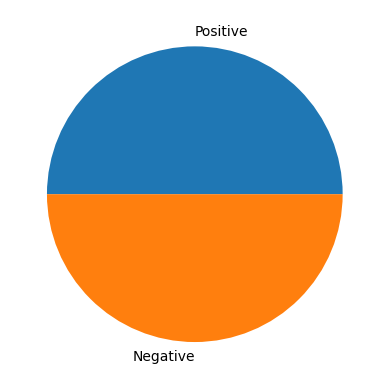

In [6]:
data_distribution = [len(positive_reviews),len(negative_reviews)]
labels = ['Positive','Negative']
plt.pie(data_distribution,labels = labels)
plt.show

In [7]:
def tokenize_reviews(reviews):
    tokens = []
    for review in reviews:
        tokens.append(word_tokenize(review))
    return tokens

In [8]:
def remove_stop_words(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    filtered_tokens = []
    for word in tokens:
        if word not in stopwords:
            filtered_tokens.append(word)
    return filtered_tokens

In [9]:
def stemming(filtered_tokens):
    stemmed_tokens = []
    for token in filtered_tokens:
        stemmed_tokens.append(PorterStemmer().stem(token))
    return stemmed_tokens

In [10]:
def lemmatize_tokens(filtered_tokens):
    tokens = []
    lemmatizer = WordNetLemmatizer()
    for token in filtered_tokens:
          tokens.append(lemmatizer.lemmatize(token))
    return tokens

In [11]:
def join_string(tokens):
    return ' '.join(tokens)

In [12]:
def preprocess(reviews):
    reviews = [re.sub(r"[^a-zA-Z0-9\s]+", "", review) for review in reviews]
    reviews = tokenize_reviews(reviews)
    reviews = [lemmatize_tokens(review) for review in reviews]
#     reviews = [stemming(review) for review in reviews]
    reviews = [remove_stop_words(review) for review in reviews]
    reviews = [join_string(review) for review in reviews]
    return reviews

In [13]:
positive_reviews = preprocess(positive_reviews)
negative_reviews = preprocess(negative_reviews)

In [14]:
movies_reviews = positive_reviews + negative_reviews
reviews_classes = np.append(np.ones(1000, dtype=int), np.zeros(1000, dtype=int))

data = {'reviews': movies_reviews, 'sentiment': reviews_classes} # 1 for positive, 0 for negative
df = pd.DataFrame(data)
print(df)

                                                reviews  sentiment
0     film adapted comic book plenty success whether...          1
1     every movie come along suspect studio every in...          1
2     youve got mail work alot better deserves order...          1
3     jaw rare film grab attention show single image...          1
4     moviemaking lot like general manager nfl team ...          1
...                                                 ...        ...
1995  anything stigma taken warning releasing simila...          0
1996  john boormans zardoz goofy cinematic debacle f...          0
1997  kid hall acquired taste took least season watc...          0
1998  wa time john carpenter wa great horror directo...          0
1999  two party guy bob head haddaways dance hit lov...          0

[2000 rows x 2 columns]


In [15]:
print('Sample Preprocessed Review: ')
print(df['reviews'][0])

Sample Preprocessed Review: 
film adapted comic book plenty success whether theyre superheroes batman superman spawn geared toward kid casper arthouse crowd ghost world never really comic book like hell starter wa created alan moore eddie campbell brought medium whole new level mid 80 12part series called watchman say moore campbell thoroughly researched subject jack ripper would like saying michael jackson starting look little odd book graphic novel 500 page long includes nearly 30 consist nothing footnote word dont dismiss film source get past whole comic book thing might find another stumbling block hell director albert allen hughes getting hughes brother direct seems almost ludicrous casting carrot top well anything riddle better direct film thats set ghetto feature really violent street crime mad genius behind menace ii society ghetto question course whitechapel 1888 london east end filthy sooty place whore called unfortunate starting get little nervous mysterious psychopath ha ca

In [16]:
x = df["reviews"]
y = df["sentiment"]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(movies_reviews).toarray()
X.shape

(2000, 5000)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, # 20% 
    random_state=2022,
    stratify=df.sentiment
)

Naive Bayes Classifier Model

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nb_classifier = MultinomialNB()


nb_classifier.fit(X_train, y_train)


y_pred = nb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print(classification_report(y_test, y_pred))


Accuracy: 0.8075
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       200
           1       0.86      0.74      0.79       200

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



SVM Classifier Model

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm_classifier = SVC(kernel='linear', C=1.0)
nb_classifier = MultinomialNB()
svm_classifier.fit(X_train, y_train)
y_pred2 = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.845
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       200
           1       0.86      0.74      0.79       200

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [21]:
def Test_Model(sentence):
    sen = cv.transform([sentence]).toarray()
    res = svm_classifier.predict(sen)[0]
    if res ==0:
        print("Negative Review")
    else:
        print("Positive Review")

In [22]:
test_data = [
    ("This movie was amazing, I loved it!"),        # Positive
    ("I didn't enjoy this movie, it was boring."),  # Negative
    ("The acting was superb, but the plot was lacking."),  # Negative
    ("I found the storyline intriguing and the characters engaging."),  # Positive
    ("The special effects were impressive, but the pacing felt off."),  # Negative
]


for sentence in test_data:
    print("Sentence:", sentence)
    Test_Model(sentence)
    print()


Sentence: This movie was amazing, I loved it!
Positive Review

Sentence: I didn't enjoy this movie, it was boring.
Negative Review

Sentence: The acting was superb, but the plot was lacking.
Negative Review

Sentence: I found the storyline intriguing and the characters engaging.
Positive Review

Sentence: The special effects were impressive, but the pacing felt off.
Negative Review



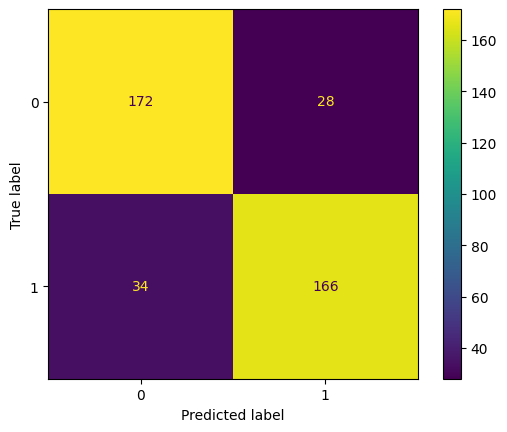

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()